## The Battle of the German Cities

### Install nessecary packages 

In [1]:
!pip install geopy

In [2]:
! pip install geocoder

In [3]:
! pip install folium

### Import nesseacary libraries 

In [4]:
import pandas as pd
import numpy as np
import random # library for random number generation
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib for ploting the WCSS (Within Cluster Sum of Squares)for the different number of clusters
from matplotlib import pyplot as plt

import folium # map rendering library

from geopy.geocoders import Nominatim # for getting latitude and longitude

print('Libraries imported.')

Libraries imported.


### Data Acquisition 

In [5]:
#Import the data 
deu_df=pd.read_csv('Data Science Capstone/github/Germany Cities Database.csv')
print('Size of the dataframe:',deu_df.shape)
deu_df.head()

Size of the dataframe: (612, 9)


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Berlin,52.5167,13.3833,Germany,DE,Berlin,primary,3644826.0,3644826.0
1,Hamburg,53.5500,10.0000,Germany,DE,Hamburg,admin,1841179.0,1841179.0
2,Munich,48.1372,11.5755,Germany,DE,Bavaria,admin,1471508.0,1471508.0
3,Cologne,50.9422,6.9578,Germany,DE,North Rhine-Westphalia,NaN,1085664.0,1085664.0
4,Frankfurt,50.1136,8.6797,Germany,DE,Hesse,minor,753056.0,753056.0


### Data Cleaning 

In [6]:
# Remove rows that have no data for population "NaN"
deu_df.dropna(subset=["population"], axis=0, inplace=True) 
print('Size of the dataframe:', deu_df.shape)
deu_df.tail() # checking dataframe after dropping NaN 

Size of the dataframe: (602, 9)


,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
597,Altenkirchen,50.6872,7.6456,Germany,DE,Rhineland-Palatinate,minor,6263.0,6263.0
598,Neustadt,49.7306,12.1706,Germany,DE,Bavaria,minor,5727.0,5727.0
599,Seelow,52.5167,14.3831,Germany,DE,Brandenburg,minor,5426.0,5426.0
600,Kusel,49.5347,7.3981,Germany,DE,Rhineland-Palatinate,minor,5405.0,5405.0
601,Cochem,50.1469,7.1667,Germany,DE,Rhineland-Palatinate,minor,5312.0,5312.0


In [7]:
#Remove columns which are not needed 
deu_df = deu_df.drop (columns =['country', 'iso2','population_proper'])
print('Size of the dataframe:', deu_df.shape)# Check the dataframe after cleaning data  
deu_df.head()

Size of the dataframe: (602, 6)


,city,lat,lng,admin_name,capital,population
0,Berlin,52.5167,13.3833,Berlin,primary,3644826.0
1,Hamburg,53.5500,10.0000,Hamburg,admin,1841179.0
2,Munich,48.1372,11.5755,Bavaria,admin,1471508.0
3,Cologne,50.9422,6.9578,North Rhine-Westphalia,NaN,1085664.0
4,Frankfurt,50.1136,8.6797,Hesse,minor,753056.0


In [8]:
#Rename column names for better understandings 
deu_df.rename(columns = {'lat':'Latitude','lng':'Longitude','admin_name':'German State'},inplace=True) #renaming column names
deu_df.head()

,city,Latitude,Longitude,German State,capital,population
0,Berlin,52.5167,13.3833,Berlin,primary,3644826.0
1,Hamburg,53.5500,10.0000,Hamburg,admin,1841179.0
2,Munich,48.1372,11.5755,Bavaria,admin,1471508.0
3,Cologne,50.9422,6.9578,North Rhine-Westphalia,NaN,1085664.0
4,Frankfurt,50.1136,8.6797,Hesse,minor,753056.0


In [9]:
# Generate descriptive statistics (descriptive statistics summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values)
deu_df.describe()

,Latitude,Longitude,population
count,602.000000,602.000000,6.020000e+02
mean,50.787846,9.339870,7.681314e+04
std,1.622112,2.073145,1.994928e+05
min,47.514200,6.083800,5.312000e+03
25%,49.469600,7.626025,2.608500e+04
50%,50.976700,8.883300,3.620850e+04
75%,51.843350,10.868350,5.887200e+04
max,54.781900,14.987200,3.644826e+06


In [10]:
#Removing cities having population < 100000 (Around 4th quartile: the highest 25% of numbers)

lenth = deu_df.shape[0]
for i in range(0,lenth):
    if (deu_df['population'][i]<100000):
        deu_df.drop([i],axis=0, inplace= True)
        
deu_df.shape      

(81, 6)

In [11]:
# Showing Germany's capital 
df_cap = deu_df.groupby('capital')
df_cap.get_group('primary')

,city,Latitude,Longitude,German State,capital,population
0,Berlin,52.5167,13.3833,Berlin,primary,3644826.0


In [12]:
#Show Each states' capital 
df_cap.get_group('admin')

,city,Latitude,Longitude,German State,capital,population
1,Hamburg,53.5500,10.0000,Hamburg,admin,1841179.0
2,Munich,48.1372,11.5755,Bavaria,admin,1471508.0
5,Bremen,53.1153,8.7975,Bremen,admin,724909.0
6,Stuttgart,48.7761,9.1775,Baden-Württemberg,admin,634830.0
7,Düsseldorf,51.2311,6.7724,North Rhine-Westphalia,admin,619294.0
10,Dresden,51.0493,13.7384,Saxony,admin,555805.0
12,Hannover,52.3744,9.7386,Lower Saxony,admin,538068.0
23,Wiesbaden,50.0825,8.2400,Hesse,admin,278342.0
27,Kiel,54.3233,10.1394,Schleswig-Holstein,admin,247548.0
31,Magdeburg,52.1278,11.6292,Saxony-Anhalt,admin,238697.0


### Exploratory data analysis

In order to explore different venues in German cities, __Foursquare API__ will be applied.

In [13]:
CLIENT_ID = '##' # Foursquare ID (hidden)
CLIENT_SECRET = '##' #  Foursquare Secret (hidden)
VERSION = 20180605 #Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Credentials Accepted')#user credentials are hidden

Credentials Accepted


In [14]:
# The following function is created to get the venues in cities from API

def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    deu_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    deu_venues.columns = ['city', 
                  'city Latitude', 
                  'city Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(deu_venues)


In [15]:
deu_venues = getNearbyVenues(names=deu_df['city'],
                                   latitudes=deu_df['Latitude'],
                                   longitudes=deu_df['Longitude']
                             )

Berlin
Hamburg
Munich
Cologne
Frankfurt
Bremen
Stuttgart
Düsseldorf
Dortmund
Essen
Dresden
Leipzig
Hannover
Nuremberg
Duisburg
Bochum
Wuppertal
Bielefeld
Bonn
Münster
Karlsruhe
Mannheim
Augsburg
Wiesbaden
Mönchengladbach
Gelsenkirchen
Braunschweig
Kiel
Aachen
Chemnitz
Halle
Magdeburg
Freiburg im Breisgau
Krefeld
Lübeck
Oberhausen
Rostock
Erfurt
Kassel
Hagen
Mainz
Saarbrücken
Hamm
Potsdam
Ludwigshafen
Mülheim
Oldenburg
Osnabrück
Leverkusen
Heidelberg
Solingen
Darmstadt
Herne
Neuss
Regensburg
Paderborn
Ingolstadt
Würzburg
Fürth
Ulm
Heilbronn
Pforzheim
Wolfsburg
Göttingen
Bottrop
Reutlingen
Koblenz
Bremerhaven
Recklinghausen
Bergisch Gladbach
Erlangen
Jena
Remscheid
Trier
Salzgitter
Moers
Siegen
Hildesheim
Cottbus
Gütersloh
Kaiserslautern


In [16]:
# Showing the new dataframe and its size
print('Size of the new venues dataframe',deu_venues.shape)
deu_venues.head()

Size of the new venues dataframe (3538, 7)


,city,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berlin,52.5167,13.3833,Butter Lindner,52.517879,13.380450,Gourmet Shop
1,Berlin,52.5167,13.3833,Adlon Spa by Resense,52.515823,13.380434,Spa
2,Berlin,52.5167,13.3833,Hotel Adlon Kempinski Berlin,52.516038,13.380125,Hotel
3,Berlin,52.5167,13.3833,Komische Oper,52.515968,13.386701,Opera House
4,Berlin,52.5167,13.3833,Windhorst,52.518553,13.386270,Cocktail Bar


In [17]:
# Count the amount of venues for each city 
deu_venues.groupby('city').count()

,city Latitude,city Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
city,,,,,,
Aachen,100,100,100,100,100,100
Augsburg,31,31,31,31,31,31
Bergisch Gladbach,7,7,7,7,7,7
Berlin,39,39,39,39,39,39
Bielefeld,35,35,35,35,35,35
...,...,...,...,...,...,...
Ulm,82,82,82,82,82,82
Wiesbaden,56,56,56,56,56,56
Wolfsburg,32,32,32,32,32,32


In [18]:
# How many unique categories in all the returned venues
print('There are {} uniques categories.'.format(len(deu_venues['Venue Category'].unique())))

There are 271 uniques categories.


In [19]:
# One-hot encoding 

# Implement One-hot encoding
deu_onehot = pd.get_dummies(deu_venues[['Venue Category']], prefix="", prefix_sep="")

# Add city column back to dataframe
deu_onehot['city'] = deu_venues['city'] 

# Move 'city' column to the first column
fixed_columns = [deu_onehot.columns[-1]] + list(deu_onehot.columns[:-1])
deu_onehot = deu_onehot[fixed_columns]

deu_onehot.head()

,city,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Berlin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Group deu_onehot by 'city' and return the mean of the values (frequency of each venue's occurrence)
deu_group= deu_onehot.groupby('city').mean().reset_index()
deu_group.head()

,city,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Aachen,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.000000,0.000000,...,0.010000,0.000000,0.01,0.0,0.0,0.010000,0.0,0.0,0.0,0.0
1,Augsburg,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Bergisch Gladbach,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.000000,0.142857,...,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Berlin,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.025641,0.000000,...,0.000000,0.025641,0.00,0.0,0.0,0.025641,0.0,0.0,0.0,0.0
4,Bielefeld,0.0,0.0,0.0,0.0,0.0,0.00,0.028571,0.000000,0.000000,...,0.028571,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Find the top 10 venues for each city

In [21]:
# Create a function to sort venues (in descending order)
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [22]:

num_top_venues = 10 # top 10 venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe containing city names and their top 10 venues

deu_venue_sort = pd.DataFrame(columns=columns)
deu_venue_sort['city'] = deu_group['city']

for ind in np.arange(deu_group.shape[0]):
    deu_venue_sort.iloc[ind, 1:] = return_most_common_venues(deu_group.iloc[ind, :], num_top_venues)

deu_venue_sort.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aachen,Drugstore,Ice Cream Shop,Italian Restaurant,Plaza,Bakery,Hotel,Café,German Restaurant,Sushi Restaurant,Coffee Shop
1,Augsburg,Italian Restaurant,Indie Movie Theater,Historic Site,Bar,Theater,Steakhouse,Bavarian Restaurant,Garden,Clothing Store,German Restaurant
2,Bergisch Gladbach,Art Museum,German Restaurant,Music Venue,Business Service,Restaurant,Mexican Restaurant,Farmers Market,Falafel Restaurant,Escape Room,Ethiopian Restaurant
3,Berlin,Plaza,Gourmet Shop,Monument / Landmark,Café,Sandwich Place,Bookstore,Restaurant,Clothing Store,Cocktail Bar,Cosmetics Shop
4,Bielefeld,Café,Mediterranean Restaurant,Bar,Coffee Shop,Ice Cream Shop,Light Rail Station,Steakhouse,Mexican Restaurant,Spanish Restaurant,Castle


In [23]:
#New data frame's size 
print('Size of the new dataframe with top 10 venues',deu_venue_sort.shape)

Size of the new dataframe with top 10 venues (80, 11)


### K-Means Clustering

Apply K-Means to cluster and find right cities (here set the number of cluster = 5)

In [24]:
# Drop city columns for keeping a datafram with only top 10 venues columns
deu_cluster = deu_group.drop('city', 1) 
deu_cluster

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0.0,0.0,0.000000,0.0,0.0,0.01,0.000000,0.000000,0.000000,0.0,...,0.010000,0.000000,0.010000,0.0,0.000000,0.010000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.142857,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.025641,0.000000,0.0,...,0.000000,0.025641,0.000000,0.0,0.000000,0.025641,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.00,0.028571,0.000000,0.000000,0.0,...,0.028571,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.012195,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.012195,0.0,0.0,0.0,0.0
76,0.0,0.0,0.035714,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,...,0.035714,0.000000,0.000000,0.0,0.017857,0.000000,0.0,0.0,0.0,0.0
77,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,...,0.031250,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
78,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [25]:
# Perform K-means clustering from 1 to 10 clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(deu_cluster)
    wcss.append(kmeans.inertia_)

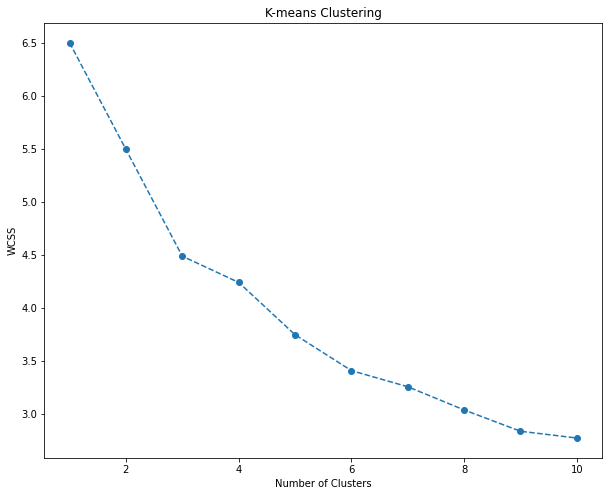

In [26]:
# Plot the Within Cluster Sum of Squares for the different number of clusters
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

Accoring to the above figure, 4 seems to be the optimal number for clustering 

In [27]:
# Perform K-means clustering with K=4 
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
kmeans.fit(deu_cluster)

#Check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 2], dtype=int32)

In [28]:
# Add clustering labels
deu_venue_sort.insert(0, 'Cluster Labels', kmeans.labels_)

In [29]:
# Merge city dataframe with city venues (for adding latitude/longitude for each neighborhood)
newdf_deu = deu_df.join(deu_venue_sort.set_index('city'), on='city')

newdf_deu.head() # Check the new datframe and new cluster label columns

,city,Latitude,Longitude,German State,capital,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berlin,52.5167,13.3833,Berlin,primary,3644826.0,1.0,Plaza,Gourmet Shop,Monument / Landmark,Café,Sandwich Place,Bookstore,Restaurant,Clothing Store,Cocktail Bar,Cosmetics Shop
1,Hamburg,53.5500,10.0000,Hamburg,admin,1841179.0,1.0,Coffee Shop,Hotel,Vietnamese Restaurant,Café,Cosmetics Shop,German Restaurant,Restaurant,Burger Joint,Clothing Store,Furniture / Home Store
2,Munich,48.1372,11.5755,Bavaria,admin,1471508.0,0.0,Café,Hotel,Plaza,Clothing Store,Bavarian Restaurant,Coffee Shop,German Restaurant,Boutique,Shopping Mall,Cocktail Bar
3,Cologne,50.9422,6.9578,North Rhine-Westphalia,NaN,1085664.0,1.0,Hotel,Italian Restaurant,Café,Coffee Shop,Bakery,German Restaurant,Plaza,Art Museum,Gift Shop,Asian Restaurant
4,Frankfurt,50.1136,8.6797,Hesse,minor,753056.0,1.0,Café,Plaza,Coffee Shop,Bar,Nightclub,Pastry Shop,Italian Restaurant,Art Museum,Hotel,German Restaurant


In [30]:
#Check weather there are rows have no cluster lables ("NaN")
newdf_deu[newdf_deu['Cluster Labels'].isnull()]

,city,Latitude,Longitude,German State,capital,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
72,Remscheid,51.1906,7.2247,North Rhine-Westphalia,minor,110994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Remove the row that has no cluster label
newdf_deu.drop(index=72, inplace=True)
newdf_deu.shape

(80, 17)

### Plotting German cities on the map in clusters
The Federal Republic of Germany (German: Deutschlandkarte) is located on the geographic coordinates of 51.5167°N Latitude and 9.9167° Longitude in Europe.=> [latitude, longitude]=[51.5167, 9.9167 ]

In [32]:
# Using folium to create a map
map_clusters = folium.Map(location=[51.5167, 9.9167], zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newdf_deu['Latitude'], newdf_deu['Longitude'], newdf_deu['city'], newdf_deu['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine clusters

Cluster 1: Café, bars, restaurants, shopping 

In [33]:
newdf_deu.loc[newdf_deu['Cluster Labels'] == 0, newdf_deu.columns[[0] + list(range(5, newdf_deu.shape[1]))]]

,city,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Munich,1471508.0,0.0,Café,Hotel,Plaza,Clothing Store,Bavarian Restaurant,Coffee Shop,German Restaurant,Boutique,Shopping Mall,Cocktail Bar
6,Stuttgart,634830.0,0.0,Café,Bar,German Restaurant,Nightclub,Clothing Store,Plaza,Coffee Shop,Cocktail Bar,Wine Bar,Italian Restaurant
13,Nuremberg,518365.0,0.0,Café,German Restaurant,Coffee Shop,Bar,Plaza,Italian Restaurant,Hotel,Franconian Restaurant,Drugstore,Modern European Restaurant
14,Duisburg,498590.0,0.0,Café,Bar,Italian Restaurant,Drugstore,Music Venue,Greek Restaurant,Bakery,Gift Shop,Sushi Restaurant,Restaurant
15,Bochum,364628.0,0.0,Ice Cream Shop,Café,Bakery,Drugstore,German Restaurant,Toy / Game Store,Pedestrian Plaza,Beer Bar,Plaza,Coffee Shop
17,Bielefeld,333786.0,0.0,Café,Mediterranean Restaurant,Bar,Coffee Shop,Ice Cream Shop,Light Rail Station,Steakhouse,Mexican Restaurant,Spanish Restaurant,Castle
18,Bonn,327258.0,0.0,Café,Bar,Drugstore,Italian Restaurant,Plaza,Pub,Nightclub,Ice Cream Shop,Hotel,German Restaurant
19,Münster,314319.0,0.0,Café,Italian Restaurant,Bar,Plaza,Gastropub,Bookstore,Ice Cream Shop,Pub,Bakery,German Restaurant
21,Mannheim,309370.0,0.0,Café,Plaza,Italian Restaurant,Hotel,Restaurant,Bar,German Restaurant,Turkish Restaurant,Sushi Restaurant,Farmers Market
29,Chemnitz,245403.0,0.0,Café,Ice Cream Shop,Plaza,Clothing Store,Pub,Italian Restaurant,Drugstore,Outdoor Sculpture,German Restaurant,Sushi Restaurant


Cluster 2: Hotels and Leisure (Museums, theaters, parks)

In [34]:
newdf_deu.loc[newdf_deu['Cluster Labels'] == 1, newdf_deu.columns[[0] + list(range(5, newdf_deu.shape[1]))]]

,city,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berlin,3644826.0,1.0,Plaza,Gourmet Shop,Monument / Landmark,Café,Sandwich Place,Bookstore,Restaurant,Clothing Store,Cocktail Bar,Cosmetics Shop
1,Hamburg,1841179.0,1.0,Coffee Shop,Hotel,Vietnamese Restaurant,Café,Cosmetics Shop,German Restaurant,Restaurant,Burger Joint,Clothing Store,Furniture / Home Store
3,Cologne,1085664.0,1.0,Hotel,Italian Restaurant,Café,Coffee Shop,Bakery,German Restaurant,Plaza,Art Museum,Gift Shop,Asian Restaurant
4,Frankfurt,753056.0,1.0,Café,Plaza,Coffee Shop,Bar,Nightclub,Pastry Shop,Italian Restaurant,Art Museum,Hotel,German Restaurant
7,Düsseldorf,619294.0,1.0,Art Museum,Brewery,Nightclub,Bar,Plaza,Hotel,Park,Steakhouse,Beer Garden,Beer Bar
8,Dortmund,587010.0,1.0,Café,Coffee Shop,Plaza,Bakery,Ice Cream Shop,Hotel,Pizza Place,Clothing Store,Japanese Restaurant,Sports Bar
9,Essen,583109.0,1.0,Hotel,Plaza,Italian Restaurant,Bakery,Coffee Shop,Drugstore,Cocktail Bar,Seafood Restaurant,Furniture / Home Store,Bookstore
10,Dresden,555805.0,1.0,German Restaurant,Hotel,Burger Joint,Italian Restaurant,Museum,Café,Plaza,Art Museum,Clothing Store,Tapas Restaurant
11,Leipzig,542529.0,1.0,Hostel,Tram Station,Zoo,Falafel Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Farmers Market
12,Hannover,538068.0,1.0,Coffee Shop,Café,Italian Restaurant,Burger Joint,Sushi Restaurant,Theater,Clothing Store,Plaza,Cocktail Bar,Drugstore


Cluster 3: Event places, soccer fields

In [35]:
newdf_deu.loc[newdf_deu['Cluster Labels'] == 2, newdf_deu.columns[[0] + list(range(5, newdf_deu.shape[1]))]]

,city,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Bremen,724909.0,2.0,Soccer Field,Zoo,Farmers Market,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Fast Food Restaurant


Cluster 4: Event places, intersections

In [36]:
newdf_deu.loc[newdf_deu['Cluster Labels'] == 3, newdf_deu.columns[[0] + list(range(5, newdf_deu.shape[1]))]]

,city,population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
74,Salzgitter,104948.0,3.0,Intersection,Zoo,Farmers Market,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Fast Food Restaurant


In [38]:
#List cities which are suitable for Lisa to live 
suit_deucity = newdf_deu.loc[newdf_deu['Cluster Labels'] == 1,newdf_deu.columns[[0] + list(range(5, newdf_deu.shape[1]))]]
suit_list = suit_deucity['city'].values.tolist()
suit_list

['Berlin',
 'Hamburg',
 'Cologne',
 'Frankfurt',
 'Düsseldorf',
 'Dortmund',
 'Essen',
 'Dresden',
 'Leipzig',
 'Hannover',
 'Wuppertal',
 'Karlsruhe',
 'Augsburg',
 'Wiesbaden',
 'Mönchengladbach',
 'Gelsenkirchen',
 'Braunschweig',
 'Kiel',
 'Aachen',
 'Magdeburg',
 'Oberhausen',
 'Kassel',
 'Ludwigshafen',
 'Mülheim',
 'Heidelberg',
 'Darmstadt',
 'Herne',
 'Regensburg',
 'Reutlingen',
 'Bergisch Gladbach',
 'Moers',
 'Cottbus',
 'Gütersloh']